In [1]:
#Tensorflow library. Used to implement machine learning models
import tensorflow as tf
#Numpy contains helpful functions for efficient mathematical calculations
import numpy as np
#Dataframe manipulation library
import pandas as pd
#Graph plotting library
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading in the attractions dataset
attraction_df = pd.read_csv('../dataset/cb_objekwisata.csv', sep = ',', encoding='ISO-8859-1')

In [3]:
#Loading in the ratings dataset
ratings_df = pd.read_csv('../dataset/data-rating-objek-wisata.csv', sep = ',', encoding='ISO-8859-1')

In [4]:
#Rename the columns in the ratings dataset
ratings_df.columns = ['id_user','nama', 'username', 'rating', 'tanggal', 'nama_objek','id_objek']

In [5]:
#Rename the columns in the attractions dataset
attraction_df.columns = ['id_objek','nama_objek', 'type']

In [6]:
#Create a seperate indexing column as we cannot use attraction_id
attraction_df['List Index'] = attraction_df.index
attraction_df.head()

,id_objek,nama_objek,type,List Index
0,999,AEON Mall BSD City,TEMPAT BELANJA,0
1,998,Agrowisata Teba Sari Bali,WISATA ALAM & TAMAN,1
2,997,Air Panas Banjar,WISATA ALAM & TAMAN,2
3,996,Air Terjun Aling-Aling,WISATA ALAM & TAMAN,3
4,995,Air Terjun Benang Stokal and Benang Kelambu,WISATA ALAM & TAMAN,4


In [7]:
# Now we can merge the ratings into the movies one so that we the index value in both dataframes
# Merge attractions with ratings by nama_objek as foriegn key
merge_data = attraction_df.merge(ratings_df, on='nama_objek')

In [8]:
print(len(merge_data))

42500


In [9]:
merge_data.head()

,id_objek_x,nama_objek,type,List Index,id_user,nama,username,rating,tanggal,id_objek_y
0,999,AEON Mall BSD City,TEMPAT BELANJA,0,273,_valentine_ferra,/Profile/_valentine_ferra,3,18-Jul,999
1,999,AEON Mall BSD City,TEMPAT BELANJA,0,5075,Desy A,/Profile/desyapriya,3,18-Sep,999
2,999,AEON Mall BSD City,TEMPAT BELANJA,0,11747,louisjhoo30,/Profile/louisjhoo3008,3,Okt 2018,999
3,999,AEON Mall BSD City,TEMPAT BELANJA,0,737,adihalim15,/Profile/adihalim15,4,18-Nov,999
4,999,AEON Mall BSD City,TEMPAT BELANJA,0,1022,Agusti Esden,/Profile/AgustiEsden,4,18-Nov,999


In [10]:
GroupUser = merge_data.groupby('username')
print(GroupUser)

In [11]:
#Formatting the data for input output into the RBM

In [12]:
print(len(GroupUser))

21310


In [13]:
GroupUser.head()

,id_objek_x,nama_objek,type,List Index,id_user,nama,username,rating,tanggal,id_objek_y
0,999,AEON Mall BSD City,TEMPAT BELANJA,0,273,_valentine_ferra,/Profile/_valentine_ferra,3,18-Jul,999
1,999,AEON Mall BSD City,TEMPAT BELANJA,0,5075,Desy A,/Profile/desyapriya,3,18-Sep,999
2,999,AEON Mall BSD City,TEMPAT BELANJA,0,11747,louisjhoo30,/Profile/louisjhoo3008,3,Okt 2018,999
3,999,AEON Mall BSD City,TEMPAT BELANJA,0,737,adihalim15,/Profile/adihalim15,4,18-Nov,999
4,999,AEON Mall BSD City,TEMPAT BELANJA,0,1022,Agusti Esden,/Profile/AgustiEsden,4,18-Nov,999
...,...,...,...,...,...,...,...,...,...,...
42495,571,Yellow Bridge,PEMANDANGAN & TENGARA,428,18414,Tânia A,/Profile/535t_niaa,5,Agt 2017,571
42496,571,Yellow Bridge,PEMANDANGAN & TENGARA,428,19541,Vicki2810,/Profile/Vicki2810,5,17-Jul,571
42497,571,Yellow Bridge,PEMANDANGAN & TENGARA,428,19867,wayan noesa,/Profile/wayannoesa54,5,Mei 2017,571
42498,571,Yellow Bridge,PEMANDANGAN & TENGARA,428,19934,Wetwedgie,/Profile/Wetwedgie,5,Mei 2017,571


In [14]:
#No. of users in training
Users = 21310
#create list
list_idx = []
#for each user in the group
for id_user, UserCurrent in GroupUser:
    #Temp variable that stores every attraction's rating
    temporary = [0]*len(attraction_df)
    #For Each attraction in the curUser's attraction list
    for num, attraction in UserCurrent.iterrows():
        #Divide ratings by 5 and store it
        temporary[attraction['List Index']] = attraction['rating']/5.0 
    
    #Now add the list of ratings into the training list
    list_idx.append(temporary)
    #Check to see if we finished adding in the amount of users for training
    if Users == 0:
        break
    Users -= 1

In [15]:
print(list_idx)

 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [16]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [17]:
# Building an RBM with Tf

In [18]:
#Arbitrary
unit_hidden = 20 
unit_visible = len(attraction_df)
#No. of unique attraction
v_b = tf.placeholder("float", [unit_visible])
#no. of features 
h_b = tf.placeholder("float", [unit_hidden]) 
Weight = tf.placeholder("float", [unit_visible, unit_hidden])

In [19]:
print(v_b)

Tensor("Placeholder:0", shape=(429,), dtype=float32)


In [20]:
# create visible and hidden layer units and set their activation function use sigmoid and relu functions

In [21]:
# Input Preprocessing
v_0 = tf.placeholder("float", [None, unit_visible])
_h0 = tf.nn.sigmoid(tf.matmul(v_0, Weight) + h_b)
h_0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))

#Reconstruction
_v1 = tf.nn.sigmoid(tf.matmul(h_0, tf.transpose(Weight)) + v_b)
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h_1 = tf.nn.sigmoid(tf.matmul(v1, Weight) + h_b)

In [22]:
print(Weight)

Tensor("Placeholder_2:0", shape=(429, 20), dtype=float32)


In [23]:
# set rbm training parameters

In [24]:
#learning rate
Alpa = 0.1
#create gradients
P_W_Gradients = tf.matmul(tf.transpose(v_0), h_0)
N_W_Gradients = tf.matmul(tf.transpose(v1), h_1)

#calculate contrastive divergence to maximize
contrastive_divergence = (P_W_Gradients - N_W_Gradients) / tf.to_float(tf.shape(v_0)[0])

#create methods to update the weights and biases
update_weight = Weight+ Alpa*contrastive_divergence
update_visibleBias = v_b + Alpa*tf.reduce_mean(v_0 - v1, 0)
update_hiddenBias = h_b + Alpa*tf.reduce_mean(h_0 - h_1, 0)

Instructions for updating:
Use `tf.cast` instead.


In [25]:
#set error function - RMSE
error = v_0 - v1
sum_error = tf.sqrt(tf.reduce_mean(error * error))

In [26]:
#initialze variables
#Current weight
curren_weight = np.zeros([unit_visible, unit_hidden], np.float32)
#Current visible unit biases
current_visibleBias = np.zeros([unit_visible], np.float32)
#Current hidden unit biases
cur_hiddenBias = np.zeros([unit_hidden], np.float32)
#Previous weight
previous_weight = np.zeros([unit_visible, unit_hidden], np.float32)
#Previous visible unit biases
previous_visibleBias = np.zeros([unit_visible], np.float32)
#Previous hidden unit biases
previous_hiddenBias = np.zeros([unit_hidden], np.float32)
session = tf.Session()
session.run(tf.global_variables_initializer())

In [27]:
#Train RBM with 10 epochs 

0.09375294
0.09266789
0.09153487
0.09093034
0.09004815
0.08951817
0.08867139
0.08817744
0.08813451
0.0877453
0.08727394
0.08731716
0.0871455
0.08693827
0.08687005
0.08658463
0.08651739
0.08644985
0.08630231
0.08648527
0.086120754
0.08673117
0.08621634
0.08613968
0.08601195
0.08607565
0.08629624
0.08600815
0.08580862
0.086184114
0.08593931
0.085796885
0.086012594
0.085707344
0.08575775
0.08604426
0.086072855
0.08600318
0.08596731
0.086020984
0.08558703
0.08597125
0.085919455
0.086143866
0.08618296
0.08609306
0.085769475
0.08595573
0.08607133
0.086125195
0.08596909
0.0860426
0.08577024
0.08574422
0.08584074
0.08558985
0.08599962
0.08592518
0.08586138
0.08599517
0.086052135
0.08613307
0.08594542
0.08591793
0.08614044
0.08583232
0.08594949
0.08592925
0.086143866
0.085963495
0.085911684
0.08604731
0.08597571
0.086056076
0.086138405
0.086098775
0.08569203
0.086143225
0.08579995
0.08595484
0.08600662
0.0858973
0.08580926
0.08593651
0.08592454
0.08578899
0.086139165
0.086172804
0.08583908
0.08

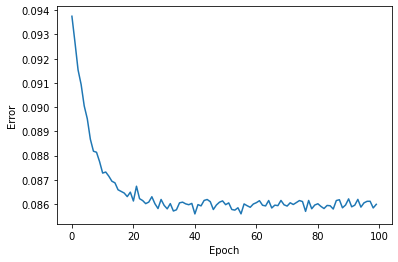

In [30]:
epochs = 100
batchsize = 1000
errors = []
for i in range(epochs):
    for start, end in zip( range(0, len(list_idx), batchsize), range(batchsize, len(list_idx), batchsize)):
        batch = list_idx[start:end]
        curren_weight = session.run(update_weight, feed_dict={v_0: batch, Weight: previous_weight, v_b: previous_visibleBias, h_b: previous_hiddenBias})
        current_visibleBias = session.run(update_visibleBias, feed_dict={v_0: batch, Weight: previous_weight, v_b: previous_visibleBias, h_b: previous_hiddenBias})
        cur_nb = session.run(update_hiddenBias, feed_dict={v_0: batch, Weight: previous_weight, v_b: previous_visibleBias, h_b: previous_hiddenBias})
        previous_weight = curren_weight
        previous_visibleBias = current_visibleBias
        previous_hiddenBias = cur_nb
    errors.append(session.run(sum_error, feed_dict={v_0: list_idx, Weight: curren_weight, v_b: current_visibleBias, h_b: cur_nb}))
    print (errors[-1])
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [34]:
def rmse(er):
    return np.sqrt((np.array(er) ** 2).mean())

In [35]:
rmse(errors)

0.086491235

In [31]:
userInput = [list_idx[1]]

In [32]:
#Feeding in the user and reconstructing the input
h_h0 = tf.nn.sigmoid(tf.matmul(v_0, Weight) + h_b)
v_v1 = tf.nn.sigmoid(tf.matmul(h_h0, tf.transpose(Weight)) + v_b)
feedding = session.run(h_h0, feed_dict={ v_0: userInput, Weight: previous_weight, h_b: previous_hiddenBias})
reconstruction = session.run(v_v1, feed_dict={ h_h0: feedding, Weight: previous_weight, v_b: previous_visibleBias})

In [33]:
attractions_scored_user = attraction_df
attractions_scored_user["Recommendation Score"] = reconstruction[0]
attractions_scored_user.sort_values(["Recommendation Score"], ascending=True).head(20)

,id_objek,nama_objek,type,List Index,Recommendation Score
188,811,Masjid Salman ITB,PEMANDANGAN & TENGARA,188,0.000177
312,687,Pulau Bangka,WISATA ALAM & TAMAN,312,0.000187
26,973,Bali Theater,LAINNYA,26,0.000192
359,640,Stasiun Kereta Gambir,TRANSPORTASI,359,0.000196
344,655,Rumah Pengasingan Bung Karno,MUSEUM,344,0.000240
105,894,Hartono Mall Yogyakarta,TEMPAT BELANJA,105,0.001384
203,796,Museum Bank Mandiri,MUSEUM,203,0.001484
352,647,Semaya One Fast Cruise,LAINNYA,352,0.001528
375,624,Taman Laut Nasional Bunaken,WISATA ALAM & TAMAN,375,0.001622
418,581,Wahana Gili Ocean,LAINNYA,418,0.001623


In [178]:
db = GroupUser.head()

def recommendation(uid):
    df = db[db['id_user'] == uid][['id_objek_x','rating']]
    df['rating'] = df['rating']/5
    dx = attraction_df['id_objek']
    dx = pd.DataFrame(dx)
    dn = pd.Series(df.rating.values,index=df.id_objek_x).to_dict()
    dx['rating'] = dx['id_objek'].map(dn).fillna(0)
    userInput = [dx['rating'].tolist()]
    h_h0 = tf.nn.sigmoid(tf.matmul(v_0, Weight) + h_b)
    v_v1 = tf.nn.sigmoid(tf.matmul(h_h0, tf.transpose(Weight)) + v_b)
    feedding = session.run(h_h0, feed_dict={ v_0: userInput, Weight: previous_weight, h_b: previous_hiddenBias})
    reconstruction = session.run(v_v1, feed_dict={ h_h0: feedding, Weight: previous_weight, v_b: previous_visibleBias})
    attractions_scored_user = attraction_df
    attractions_scored_user["Recommendation Score"] = reconstruction[0]
    return attractions_scored_user.sort_values(["Recommendation Score"], ascending=True).head(20)

In [179]:
from random import randint
n = randint(0,len(db['id_user'].unique()))
random_user = db['id_user'].unique()[n]
print('Rekomendasi Objek Pariwisata untuk user dengan id: ', random_user)
recommendation(random_user)

Rekomendasi Objek Pariwisata untuk user dengan id:  9976


,id_objek,nama_objek,type,List Index,Recommendation Score
188,811,Masjid Salman ITB,PEMANDANGAN & TENGARA,188,0.000182
312,687,Pulau Bangka,WISATA ALAM & TAMAN,312,0.000192
26,973,Bali Theater,LAINNYA,26,0.000198
359,640,Stasiun Kereta Gambir,TRANSPORTASI,359,0.000201
344,655,Rumah Pengasingan Bung Karno,MUSEUM,344,0.000246
105,894,Hartono Mall Yogyakarta,TEMPAT BELANJA,105,0.001411
203,796,Museum Bank Mandiri,MUSEUM,203,0.001513
352,647,Semaya One Fast Cruise,LAINNYA,352,0.001557
375,624,Taman Laut Nasional Bunaken,WISATA ALAM & TAMAN,375,0.001652
418,581,Wahana Gili Ocean,LAINNYA,418,0.001654


In [133]:
len(db['id_user'].unique())

20570

In [135]:
db['id_user'].unique()[300]

1815

In [136]:
recommendation(1815)

,id_objek,nama_objek,type,List Index,Recommendation Score
188,811,Masjid Salman ITB,PEMANDANGAN & TENGARA,188,0.000176
312,687,Pulau Bangka,WISATA ALAM & TAMAN,312,0.000187
26,973,Bali Theater,LAINNYA,26,0.000192
359,640,Stasiun Kereta Gambir,TRANSPORTASI,359,0.000195
344,655,Rumah Pengasingan Bung Karno,MUSEUM,344,0.000240
105,894,Hartono Mall Yogyakarta,TEMPAT BELANJA,105,0.001382
203,796,Museum Bank Mandiri,MUSEUM,203,0.001482
352,647,Semaya One Fast Cruise,LAINNYA,352,0.001526
375,624,Taman Laut Nasional Bunaken,WISATA ALAM & TAMAN,375,0.001620
418,581,Wahana Gili Ocean,LAINNYA,418,0.001621


In [181]:
len(list_idx)

21310

In [184]:
len(db['id_user'].unique())

20570